In [30]:
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers


print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [56]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [6]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [7]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"


(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화


print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))


학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


라벨:  0


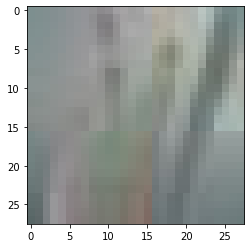

In [8]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 딥러닝 네크워크 설계하기

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [48]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(50, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(200, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))


Model에 추가된 Layer 개수:  7


In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 50)        1400      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 200)       90200     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 200)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               500100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

# 딥러닝 네트워크 학습시키기

In [94]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 4ms/step - loss: 2.3166e-07 - accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 0s 4ms/step - loss: 2.1458e-07 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 4ms/step - loss: 1.3550e-07 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 4ms/step - loss: 1.0928e-07 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 4ms/step - loss: 9.0202e-08 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 6.9141e-08 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 4ms/step - loss: 5.8810e-08 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 4ms/step - loss: 5.2055e-08 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 4ms/step - loss: 4.8478e-08 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 4ms/step - loss: 4.2518e-0

In [76]:
hist = model.fit(x_train_norm, y_train, validation_split=0.25, epochs=10, verbose=1)
print(history.history)

Epoch 1/10
8/8 [==============================] - 0s 24ms/step - loss: 5.7128e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 4.9571e-04 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 4.8352e-04 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 0s 7ms/step - loss: 4.4585e-04 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 5.5923e-04 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 3.9694e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 0s 7ms/step - loss: 3.8172e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch

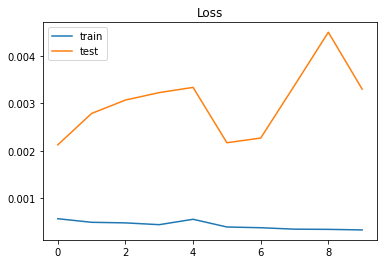

In [95]:

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()


In [13]:
image_dir_path1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path1)



100  images to be resized.
100  images resized.


In [14]:
image_dir_path1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path1)


100  images to be resized.
100  images resized.


In [15]:
image_dir_path1 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path1)


100  images to be resized.
100  images resized.


In [78]:
image_dir_path2 = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"

In [79]:
(x_test, y_test)=load_data(image_dir_path2)
x_test_norm = x_test/255.0

print("x_test shape : {}".format(x_test.shape))
print("y_test shape : {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape : (300, 28, 28, 3)
y_test shape : (300,)


# 얼마나 잘 만들었는지 확인하기

In [87]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 21.5903 - accuracy: 0.4533
test_loss : 21.5903377532959
test_accuracy : 0.4533333480358124


In [81]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


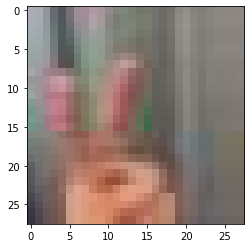

In [82]:
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

# 1. 시각화는 해봣음
# 2. 데이터셋의 다양화? 손그림을 늘려야하는 것 같은데,, 저는 아이펠 샘플로만 하여 하지 못했습니다.
# 3. 그래서 그런지 죽어도 test accuracy가 0.6이 안나옵니다. 